<a href="https://colab.research.google.com/github/Abharnak/Internal-Bleeding-Detection/blob/main/Bleeding_detection_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Dataset/WCEBleedGen

/content/drive/My Drive/Dataset/WCEBleedGen


In [ ]:

os.chdir('/content/drive/My Drive/Dataset/WCEBleedGen')
print(os.getcwd())

/content/drive/My Drive/Dataset/WCEBleedGen


In [ ]:
import os

In [ ]:
path = "/content/drive/My Drive/Dataset/WCEBleedGen"

## spliting data into train test val

In [ ]:
import shutil
import random
from pathlib import Path
from tqdm import tqdm
import re

# Paths
bleeding_path = Path('bleeding/images')
non_bleeding_path = Path('non-bleeding/images')
output_root = Path('dataset')
split_ratios = {'train': 0.7, 'val': 0.15, 'test': 0.15}

# Function to determine class of bleeding based on index
def get_bleeding_class(filename):
    match = re.search(r'\((\d+)\)', filename)  #file name -> img- (100).jpg
    if not match:
        return None
    index = int(match.group(1))
    if 1 <= index < 153:
        return 0
    elif 153 <= index < 203:
        return 1
    elif 208 <= index < 651:
        return 2
    elif 661 <= index < 953:
        return 3
    elif 953 <= index < 1310:
        return 4
    else:
        return None  # skip unknown

# Prepare folder structure
for split in ['train', 'val', 'test']:
    for cls in range(6):  # 0 to 4 = bleeding types, 5 = non-bleeding
        (output_root / split / str(cls)).mkdir(parents=True, exist_ok=True)

# Process bleeding images
bleeding_images = list(bleeding_path.glob("*.jpg")) + list(bleeding_path.glob("*.png"))
bleeding_classed = [[] for _ in range(5)]

# Group bleeding images by class
for img in bleeding_images:
    cls = get_bleeding_class(img.name)
    if cls is not None:
        bleeding_classed[cls].append(img)

# Split and move bleeding images
for cls, imgs in enumerate(bleeding_classed):
    random.shuffle(imgs)
    n = len(imgs)
    train_end = int(split_ratios['train'] * n)
    val_end = train_end + int(split_ratios['val'] * n)

    for i, img in enumerate(imgs):
        if i < train_end:
            split = 'train'
        elif i < val_end:
            split = 'val'
        else:
            split = 'test'
        shutil.copy(img, output_root / split / str(cls) / img.name)

# Process non-bleeding images
non_bleeding_images = list(non_bleeding_path.glob("*.jpg")) + list(non_bleeding_path.glob("*.png"))
random.shuffle(non_bleeding_images)
n = len(non_bleeding_images)
train_end = int(split_ratios['train'] * n)
val_end = train_end + int(split_ratios['val'] * n)

for i, img in enumerate(non_bleeding_images):
    if i < train_end:
        split = 'train'
    elif i < val_end:
        split = 'val'
    else:
        split = 'test'
    shutil.copy(img, output_root / split / '5' / img.name)


# splitting both img and annotation

In [ ]:
import os
import shutil
import re
from sklearn.model_selection import train_test_split

# === SETTINGS ===
source_dirs = {
    0: list(range(1, 153)),
    1: list(range(153, 203)),
    2: list(range(208, 651)),
    3: list(range(661, 953)),
    4: list(range(953, 1310)),
}
bleeding_img_dir = 'bleeding/images'
bleeding_mask_dir = 'bleeding/annotation'
non_bleeding_img_dir = 'non-bleeding/images'
non_bleeding_mask_dir = 'non-bleeding/annotation'

target_base = 'dataset_an'
splits = ['train', 'val', 'test']
split_ratio = [0.7, 0.15, 0.15]  # train/val/test

# === FILE HELPER ===
def extract_index(filename):
    match = re.search(r'\((\d+)\)', filename)
    return int(match.group(1)) if match else -1

def ensure_dir(path):
    os.makedirs(path, exist_ok=True)

# === COLLECT FILES ===
file_groups = {i: [] for i in range(6)}  # classes 0–5

# Bleeding
for fname in os.listdir(bleeding_img_dir):
    if not fname.endswith('.png'):
        continue
    idx = extract_index(fname)
    for class_id, ranges in source_dirs.items():
        if idx in ranges:
            file_groups[class_id].append(('bleeding', fname))
            break

# Non-bleeding → class 5
for fname in os.listdir(non_bleeding_img_dir):
    if fname.endswith('.png'):
        file_groups[5].append(('non-bleeding', fname))

# === SPLIT AND COPY ===
for class_id, files in file_groups.items():
    files = sorted(files, key=lambda x: extract_index(x[1]))
    train, temp = train_test_split(files, train_size=split_ratio[0], random_state=42)
    val, test = train_test_split(temp, test_size=split_ratio[2] / (split_ratio[1] + split_ratio[2]), random_state=42)
    split_map = {'train': train, 'val': val, 'test': test}

    for split in splits:
        for src_type, fname in split_map[split]:
            idx = extract_index(fname)
            # Paths
            if src_type == 'bleeding':
                img_src = os.path.join(bleeding_img_dir, fname)
                mask_src = os.path.join(bleeding_mask_dir, fname.replace('img', 'ann'))
            else:
                img_src = os.path.join(non_bleeding_img_dir, fname)
                mask_src = os.path.join(non_bleeding_mask_dir, fname.replace('img', 'ann'))

            # Dest
            image_dst_dir = os.path.join(target_base, split, str(class_id), 'images')
            mask_dst_dir = os.path.join(target_base, split, str(class_id), 'masks')
            ensure_dir(image_dst_dir)
            ensure_dir(mask_dst_dir)

            shutil.copy(img_src, os.path.join(image_dst_dir, fname))
            shutil.copy(mask_src, os.path.join(mask_dst_dir, fname.replace('img', 'ann')))

print("✅ Dataset restructured into `dataset/train|val|test/class_id/images|masks`.")


✅ Dataset restructured into `dataset/train|val|test/class_id/images|masks`.


# Dataset Path

In [ ]:
path = "/content/drive/My Drive/Dataset/WCEBleedGen/dataset/"
print(path)

/content/drive/My Drive/Dataset/WCEBleedGen/dataset/


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
)

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split


In [ ]:
import matplotlib.image as mpimg
from pathlib import Path
import random

In [ ]:
seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)

## Sample data

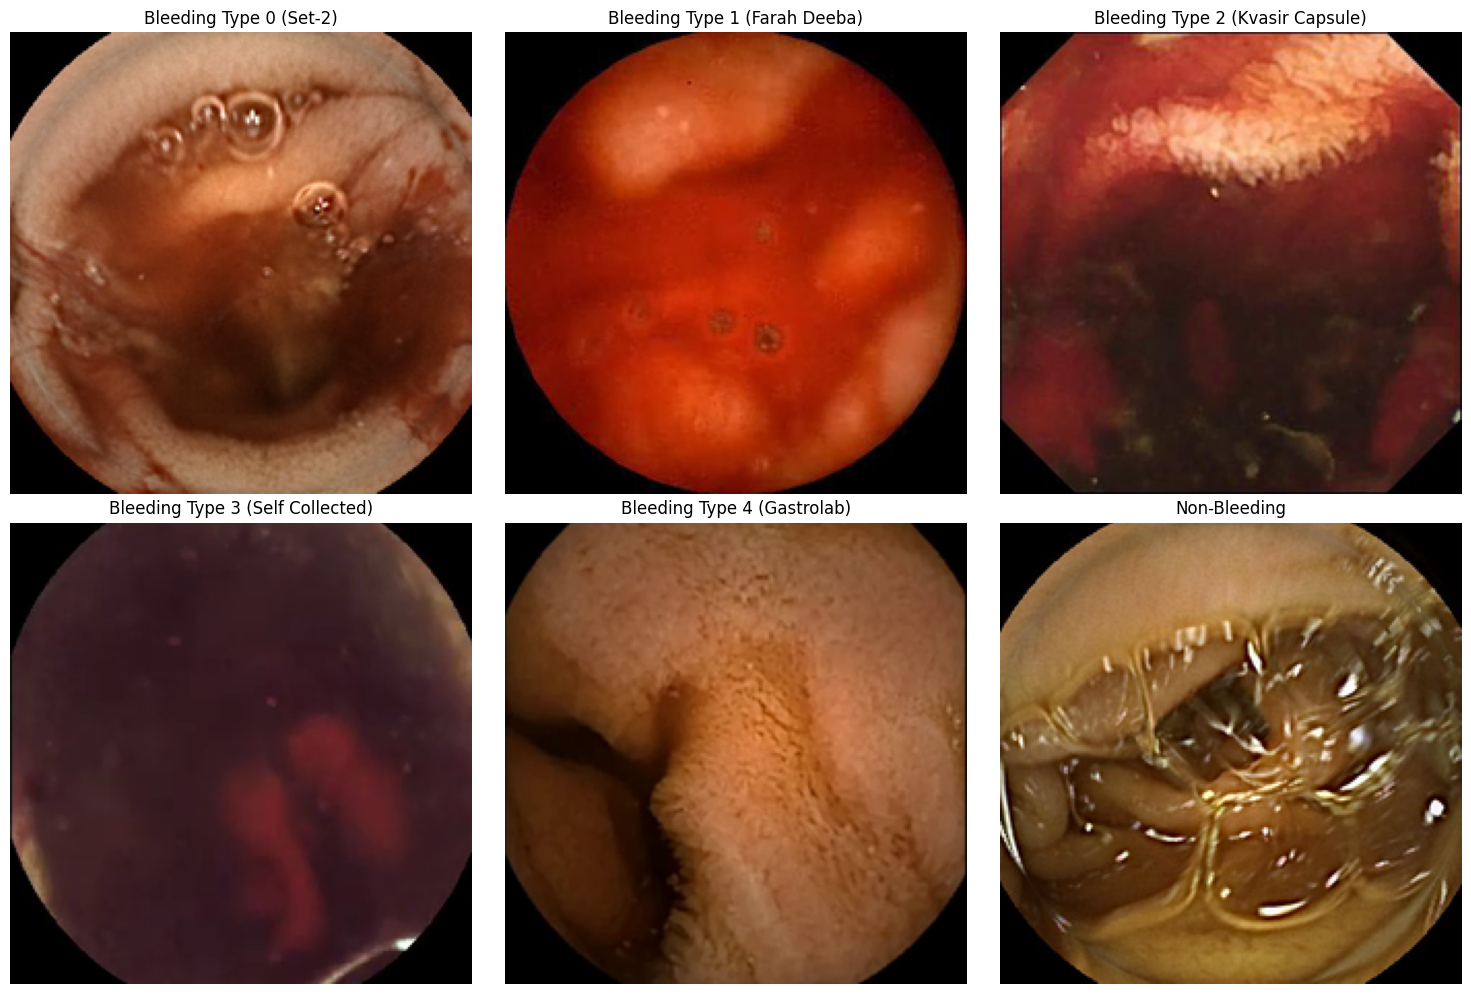

In [ ]:
# Number of classes
num_classes = 6  # 0 to 4 are bleeding types, 5 is non-bleeding

# Titles for each class
class_titles = {
    0: "Bleeding Type 0 (Set-2)",
    1: "Bleeding Type 1 (Farah Deeba)",
    2: "Bleeding Type 2 (Kvasir Capsule)",
    3: "Bleeding Type 3 (Self Collected)",
    4: "Bleeding Type 4 (Gastrolab)",
    5: "Non-Bleeding"
}

# Convert base_path to a Path object
base_path = Path("/content/drive/My Drive/Dataset/WCEBleedGen/dataset/train")

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.ravel()

for i in range(num_classes):
    class_dir = base_path / str(i)
    images = list(class_dir.glob("*.png")) + list(class_dir.glob("*.jpg"))

    if not images:
        print(f"No images found in class {i}")
        continue

    img_path = random.choice(images)
    img = mpimg.imread(img_path)

    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(class_titles.get(i, f"Class {i}"))
    ax[i].axis('off')

plt.tight_layout()
plt.show()

##Processing Data using ImageDatGenerator

In [ ]:
def process_data(img_dims, batch_size, path='dataset/'):
    path = Path(path)  # Ensure compatibility with Path operations

    # Data generators
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        # rotation_range=20,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        # fill_mode='nearest'
    )

    test_val_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        directory=path / 'train',
        target_size=(img_dims, img_dims),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    test_gen = test_val_datagen.flow_from_directory(
        directory=path / 'test',
        target_size=(img_dims, img_dims),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    # Manually load test data (optional)
    test_data = []
    test_labels = []

    for class_id in range(6):  # classes 0–5
        class_dir = path / 'test' / str(class_id)
        if not class_dir.exists():
            continue

        for img_name in os.listdir(class_dir):
            img_path = class_dir / img_name
            img = cv2.imread(str(img_path))

            if img is None:
                continue

            img = cv2.resize(img, (img_dims, img_dims))
            img = img.astype('float32') / 255.0
            test_data.append(img)
            test_labels.append(class_id)

    test_data = np.array(test_data)
    test_labels = np.array(test_labels)

    return train_gen, test_gen, test_data, test_labels


In [ ]:
img_dims = 150
epochs = 10
batch_size = 32

train_gen, test_gen, test_data, test_labels = process_data(img_dims, batch_size)

Found 1820 images belonging to 6 classes.
Found 396 images belonging to 6 classes.


# Class Distribution

In [ ]:
import os
from collections import defaultdict

base_path = 'dataset/train'  # or 'dataset/val'

class_counts = defaultdict(int)
for class_name in os.listdir(base_path):
    class_dir = os.path.join(base_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

print("Train class distribution:", dict(class_counts))


Train class distribution: {'0': 106, '1': 35, '2': 310, '3': 204, '4': 249, '5': 916}


# CNN Architecture

In [ ]:
## CNN Architecture

inputs = Input(shape=(img_dims, img_dims, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Third conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Fourth conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
# x = Flatten()(x)
x = GlobalAveragePooling2D()(x)

x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=6, activation='softmax')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.weights.h5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [ ]:
hist = model.fit(
           train_gen, steps_per_epoch=train_gen.samples // batch_size,
           validation_steps = test_gen.samples//batch_size,
           epochs=epochs, validation_data=test_gen,
           validation_steps=test_gen.samples // batch_size,
           callbacks=[checkpoint, lr_reduce])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.4787 - loss: 1.5703

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 607ms/step - accuracy: 0.4796 - loss: 1.5673 - val_accuracy: 0.4818 - val_loss: 1.5761 - learning_rate: 0.0010
Epoch 2/10
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5938 - loss: 1.4632

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5938 - loss: 1.4632 - val_accuracy: 0.4818 - val_loss: 1.5936 - learning_rate: 0.0010
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 369ms/step - accuracy: 0.6073 - loss: 1.1771 - val_accuracy: 0.4818 - val_loss: 1.5865 - learning_rate: 0.0010
Epoch 4/10
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7188 - loss: 0.9957

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.7188 - loss: 0.9957 - val_accuracy: 0.4818 - val_loss: 1.5834 - learning_rate: 0.0010
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 413ms/step - accuracy: 0.6924 - loss: 0.9056 - val_accuracy: 0.4818 - val_loss: 1.6415 - learning_rate: 3.0000e-04
Epoch 6/10
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7812 - loss: 0.8557

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7812 - loss: 0.8557 - val_accuracy: 0.4818 - val_loss: 1.6397 - learning_rate: 3.0000e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.6857 - loss: 0.8444
Epoch 7: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - accuracy: 0.6859 - loss: 0.8441 - val_accuracy: 0.4818 - val_loss: 1.6321 - learning_rate: 3.0000e-04
Epoch 8/10
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7188 - loss: 0.8125

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7188 - loss: 0.8125 - val_accuracy: 0.4818 - val_loss: 1.6312 - learning_rate: 9.0000e-05
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 401ms/step - accuracy: 0.7233 - loss: 0.7425 - val_accuracy: 0.4818 - val_loss: 1.6420 - learning_rate: 9.0000e-05
Epoch 10/10
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6562 - loss: 1.0782

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6562 - loss: 1.0782 - val_accuracy: 0.4818 - val_loss: 1.6421 - learning_rate: 9.0000e-05


In [ ]:
history=model.fit(
    train_gen,
    epochs=epochs,
    validation_data=test_gen,
    callbacks=[checkpoint, lr_reduce, early_stop]
)


In [ ]:
# Save full model in .h5 format
model.save('bleeding_classifier_model.h5')

# Model Accuracy and Loss (CNN)

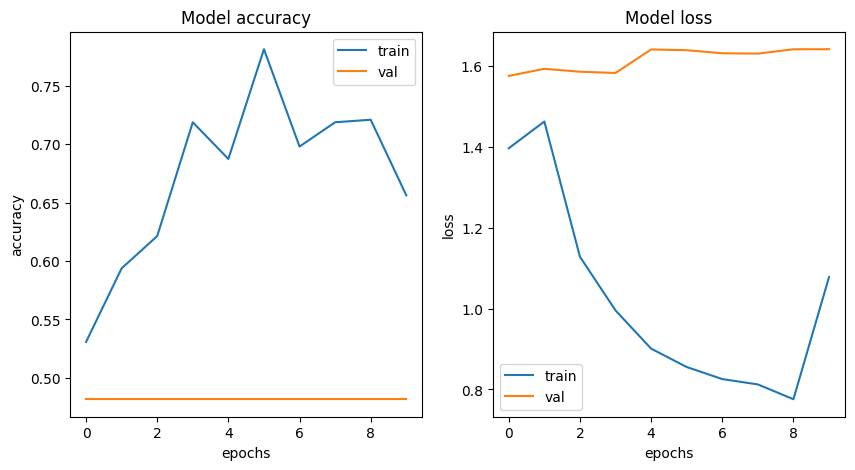

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])

    ax[i].set_title('Model {}'.format(met))

    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)

    ax[i].legend(['train', 'val'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


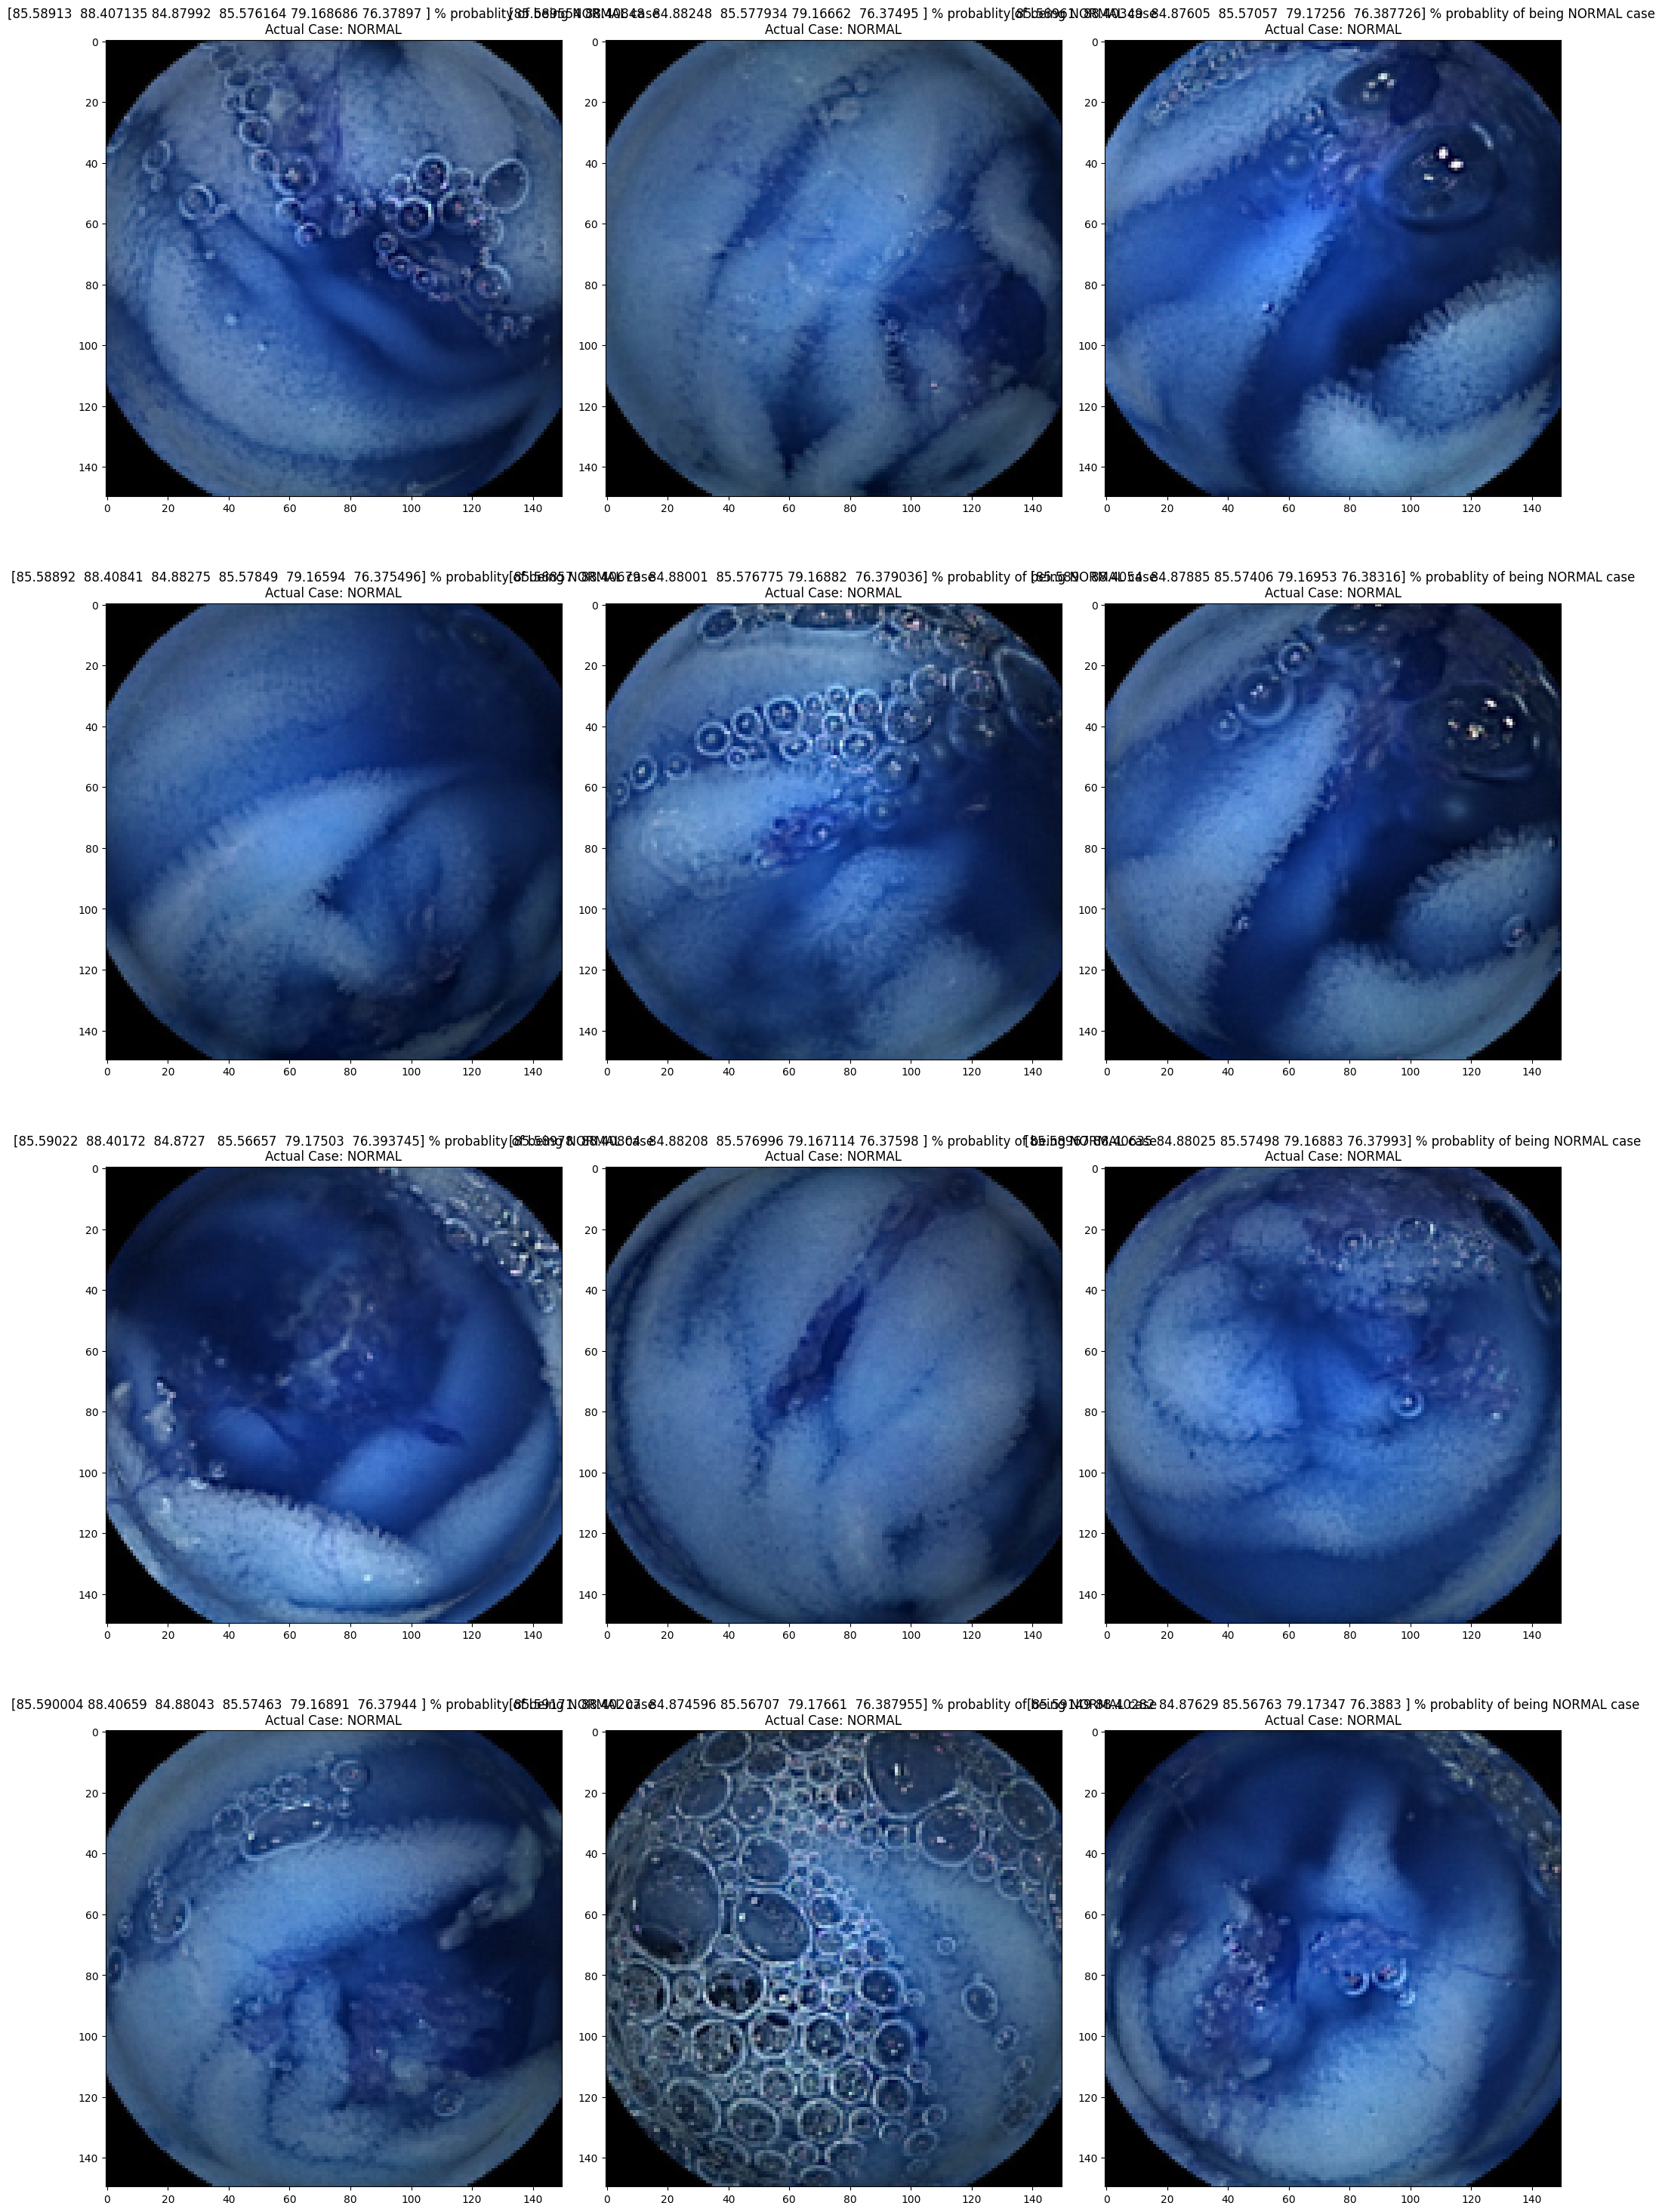

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
ax = ax.ravel()
plt.tight_layout()
preds = model.predict(test_data)
for i in range(12):
    ax[i].imshow(test_data[i], cmap='gray')

    if test_labels[i] == 0:
        ax[i].set_title('{} % probablity of being NORMAL case'.format((1 - preds[i])*100) + '\n' + 'Actual Case: NORMAL')
    else:
        ax[i].set_title('{} % probablity of being Bleeding case'.format(preds[i]*100) + '\n' + 'Actual Case: PNEUMONIA')

# Transfer-Learning  MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(150,150,3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/tmp/ipython-input-15-3730806993.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150,150,3), include_top=False, weights='imagenet')


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
# lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


hist=model.fit(
    train_gen,
    epochs=15,
    validation_data=test_gen
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6193 - loss: 1.2138

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 533s 9s/step - accuracy: 0.6216 - loss: 1.2062 - val_accuracy: 0.9116 - val_loss: 0.2339
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9140 - loss: 0.3005 - val_accuracy: 0.9495 - val_loss: 0.1932
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9034 - loss: 0.2672 - val_accuracy: 0.9394 - val_loss: 0.1722
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9197 - loss: 0.2374 - val_accuracy: 0.9571 - val_loss: 0.1132
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9440 - loss: 0.1612 - val_accuracy: 0.9520 - val_loss: 0.1289
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9519 - loss: 0.1491 - val_accuracy: 0.9646 - val_loss: 0.0954
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9661 - loss: 0.1210 - val_accuracy: 0.9621 - val_loss: 0.1022
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9575 - loss: 0.1197 - val_accuracy: 0.9773 - val_loss: 0.0736
Ep

In [ ]:
# Save full model in .h5 format
model.save('bleeding_classifier_model_mobilenet_new.h5')

In [ ]:
model.save('bleeding_classifier_model_mobilenet_new.keras')

In [ ]:
pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
# Exporting the model to TensorFlow.js format
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'frontend_model')

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,752,212 (10.50 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 329,486 (1.26 MB)

#Model Loss and Accuracy (MobileNet)

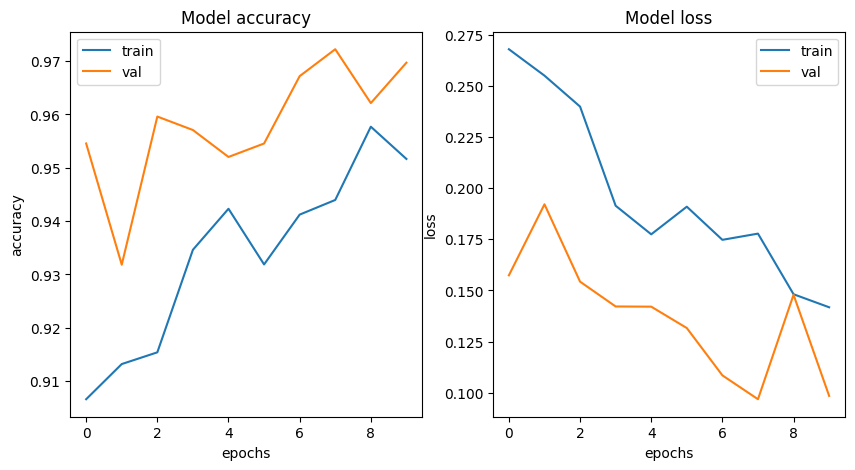

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist1.history[met])
    ax[i].plot(hist1.history['val_' + met])

    ax[i].set_title('Model {}'.format(met))

    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)

    ax[i].legend(['train', 'val'])

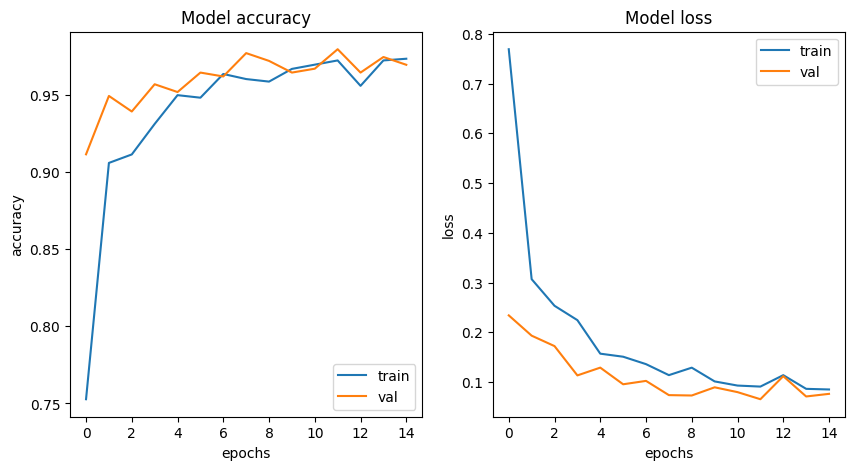

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])

    ax[i].set_title('Model {}'.format(met))

    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)

    ax[i].legend(['train', 'val'])

#Evaluating the model

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 677ms/step


Text(0.5, 1.0, 'Predicted: Bleeding Type 0 (91.38%)\nActual: Bleeding Type 0')

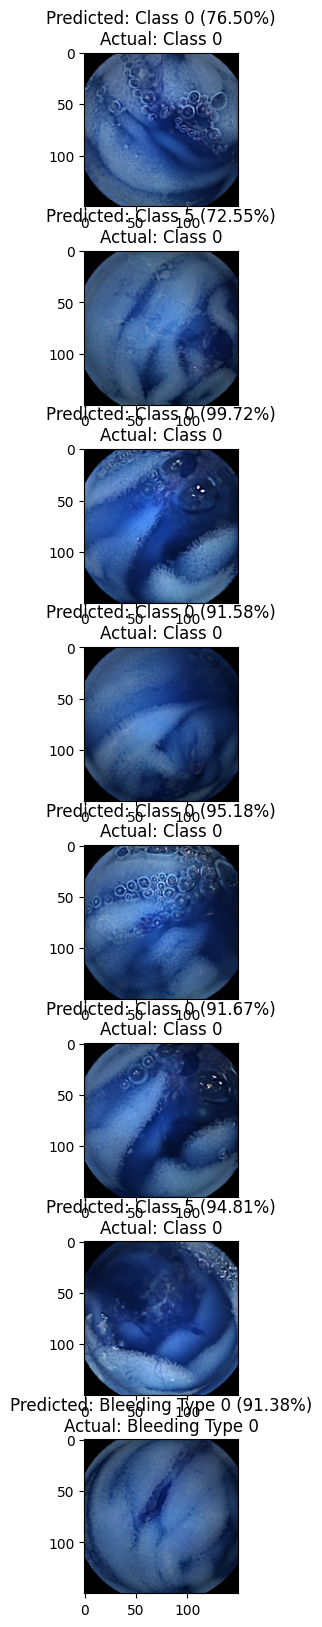

In [ ]:
num_images = min(len(test_data), 8)  # safer if you have fewer images

fig, ax = plt.subplots(num_images, 1, figsize=(8, num_images * 2))
if num_images == 1:
    ax = [ax]  # ensure it's iterable
plt.tight_layout()

preds = model.predict(test_data)

for i in range(num_images):
    ax[i].imshow(test_data[i])

    pred_class = np.argmax(preds[i])
    actual_class = test_labels[i]

    ax[i].set_title(
        f"Predicted: Class {pred_class} ({max(preds[i])*100:.2f}%)\nActual: Class {actual_class}"
    )
label_map = {
    0: 'Bleeding Type 0',
    1: 'Bleeding Type 1',
    2: 'Bleeding Type 2',
    3: 'Bleeding Type 3',
    4: 'Bleeding Type 4',
    5: 'Non-Bleeding'
}

ax[i].set_title(
    f"Predicted: {label_map[pred_class]} ({max(preds[i])*100:.2f}%)\nActual: {label_map[actual_class]}"
)


#Confusion Matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step


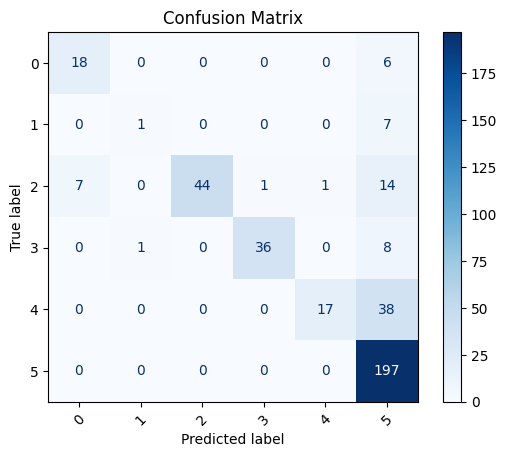

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get predicted classes
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = test_labels  # Make sure this is integer-encoded (0 to 5)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [ ]:

# Set diagonal (correct predictions) to zero so we only see misclassifications
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

# Get top 5 misclassifications (as tuples of (true_class, predicted_class))
top_confusions = np.dstack(np.unravel_index(np.argsort(cm_no_diag.ravel())[::-1], cm_no_diag.shape))[0]

print("Top 5 Most Confused Class Pairs:")
print("\n ACTUAL     PREDICTED")
for idx in range(5):
    true_class, predicted_class = top_confusions[idx]
    count = cm[true_class][predicted_class]
    if count == 0:
        break
    print(f"Class {true_class}  →  Class {predicted_class} : {count} times")


Top 5 Most Confused Class Pairs:

 ACTUAL     PREDICTED
Class 4  →  Class 5 : 38 times
Class 2  →  Class 5 : 14 times
Class 3  →  Class 5 : 8 times
Class 2  →  Class 0 : 7 times
Class 1  →  Class 5 : 7 times


#Per Class Accuracy

In [ ]:
from sklearn.metrics import classification_report

# Show precision, recall, f1-score, and support per class
print(classification_report(y_true, y_pred, target_names=[
    "Bleeding Type 0",
    "Bleeding Type 1",
    "Bleeding Type 2",
    "Bleeding Type 3",
    "Bleeding Type 4",
    "Non-Bleeding"
]))

                 precision    recall  f1-score   support

Bleeding Type 0       0.72      0.75      0.73        24
Bleeding Type 1       0.50      0.12      0.20         8
Bleeding Type 2       1.00      0.66      0.79        67
Bleeding Type 3       0.97      0.80      0.88        45
Bleeding Type 4       0.94      0.31      0.47        55
   Non-Bleeding       0.73      1.00      0.84       197

       accuracy                           0.79       396
      macro avg       0.81      0.61      0.65       396
   weighted avg       0.83      0.79      0.77       396



#Save Misclassified img

In [ ]:
import numpy as np

# Predict labels
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = test_labels

# Count mismatches
misclassified_count = np.sum(y_pred != y_true)
total_count = len(y_true)

print(f"Total test images: {total_count}")
print(f"Misclassified images: {misclassified_count}")
print(f"Accuracy: {(total_count - misclassified_count) / total_count * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Total test images: 396
Misclassified images: 62
Accuracy: 84.34%


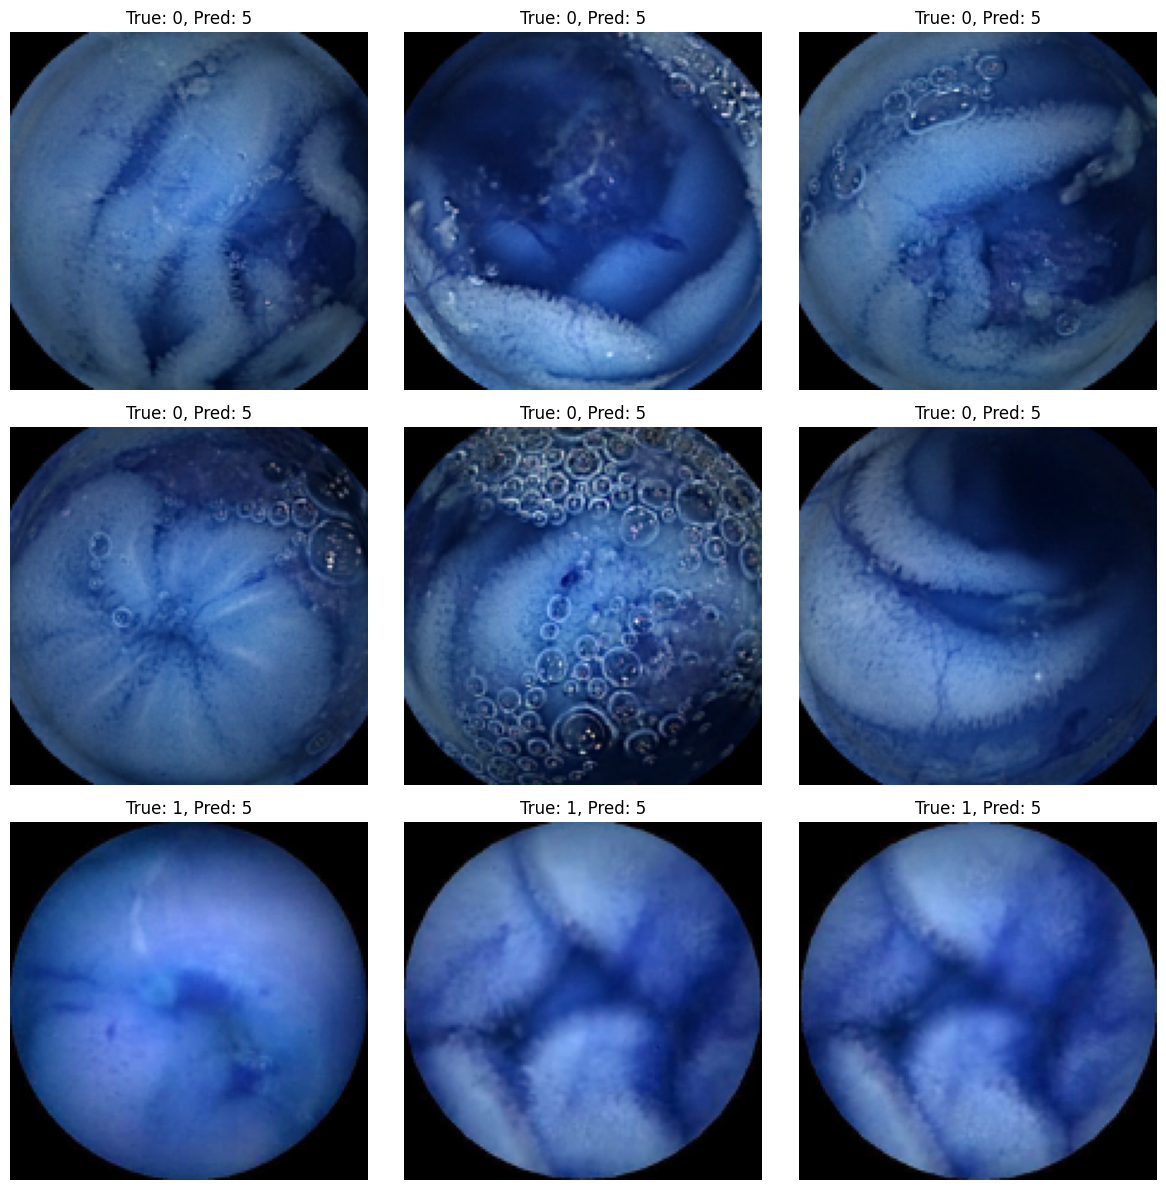

In [ ]:
mis_idx = np.where(y_true != y_pred)[0]

fig, ax = plt.subplots(3, 3, figsize=(12, 12))
ax = ax.ravel()

for i in range(min(9, len(mis_idx))):
    idx = mis_idx[i]
    ax[i].imshow(test_data[idx])
    ax[i].set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
from PIL import Image

# Create directory to save if it doesn't exist
os.makedirs("misclassified", exist_ok=True)

for i in range(len(test_data)):
    true = y_true[i]
    pred = y_pred[i]

    if true != pred:
        img = (test_data[i] * 255).astype(np.uint8)
        filename = f"misclassified/true_{true}_pred_{pred}_{i}.png"
        Image.fromarray(img).save(filename)

#GRAD-CAM
to see where the model focuses

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
# visualize grad-cam
def show_gradcam(img, heatmap, alpha=0.4):
    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert to RGB colormap
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Combine image and heatmap
    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    return superimposed_img


Last layer name

In [ ]:
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.SeparableConv2D):
        print("Last conv layer:", layer.name)
        break

Last conv layer: Conv_1


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_154']]
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)


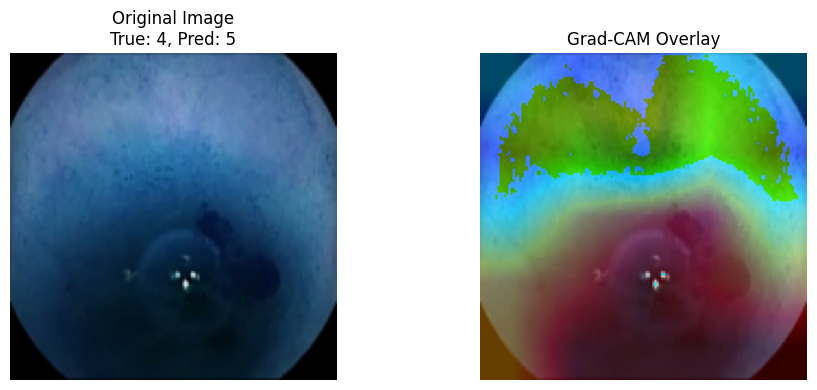

In [ ]:
# Apply Grad-CAM on Class 4 → 5 Misclassifications

# Assuming test_data is scaled between 0 and 1
# Multiply by 255 for proper display
wrong_idx = [i for i in range(len(y_true)) if y_true[i] == 4 and y_pred[i] == 5]

# Pick one misclassified Class 4 image
i = wrong_idx[0]
img = test_data[i]
img_input = np.expand_dims(img, axis=0)  # batch it

# Get last conv layer name (adjust if needed)
last_conv_layer_name = 'Conv_1'  # Replace with your last conv layer

# Get heatmap
heatmap = make_gradcam_heatmap(img_input, model, last_conv_layer_name)

# Convert image back to uint8
img_uint8 = (img * 255).astype(np.uint8)

# Overlay
overlay = show_gradcam(img_uint8, heatmap)

# Show
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_uint8)
plt.title(f"Original Image\nTrue: 4, Pred: 5")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("Grad-CAM Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
# Exporting the model to TensorFlow.js format
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'frontend_model')

NameError: name 'model' is not defined